In [ ]:
##### first option (classic way to consume API)

### obtain all the available metrics of the wholesale energy market in Colombia
import requests
import json

url = "http://servapibi.xm.com.co/lists"

body = {"MetricId": "ListadoMetricas"}
data = requests.post(url, json = body)

if data.status_code == 200:
    data = data.json()

print(json.dumps(data, indent = 4))

In [ ]:
##### second option (use the library "pydataxm" using the class methods of ReadDB specified in the repository "https://github.com/EquipoAnaliticaXM/API_XM")

### obtain all the available metrics of the wholesale energy market in Colombia

from pydataxm import *
import pandas as pd

## configurate pandas view
#pd.options.display.max_rows = None
#pd.options.display.max_columns = None
#pd.set_option('display.max_colwidth', 1000)

## create instance
objectAPI = pydataxm.ReadDB()

df = objectAPI.get_collections()
df = pd.DataFrame(df)
df.to_csv("metricas_mercado_mayorista_API_XM.csv")
df

In [ ]:
# por cada metrica nos permite ver desde cuantas entidades podemos consultar, en este caso demanda comercial vista desde el sistema, por agente y mercado de comercialización
objectAPI.get_collections('DemaCome') 

In [ ]:
# para despacho de generación solo tenemos consulta por recurso 
objectAPI.get_collections('GeneProgDesp') 

In [ ]:
import datetime as dt

df_variable = objectAPI.request_data(
    "GeneProgDesp",
    "Recurso",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

df_variable

In [2]:
##### Analisis sistemico del precio de energía Mayorista de colombia en Diciembre 2023
##### libraries & object xm instance

from pydataxm import *
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

objectAPI = pydataxm.ReadDB()

In [4]:
### functions

## function grafica de la demanda x hora y día
def plotdaysdemand(demand, title, x, y):
    fig, ax = plt.subplots(figsize=(10, 7))

    for i in range(len(demand)):
        ax.plot(demand.columns[2:-1], demand.iloc[i, 2:-1], label=f'Día {i+1}')

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)

    fig.tight_layout()
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02), ncol=1)
    plt.xticks(rotation=45)
    plt.show()

## heat map function (plot the demand)
def plotdemand(demand, title, x, y, label):
    values_by_day = demand.iloc[:, 2:-1].values

    fig, ax = plt.subplots(figsize=(10, 7))
    heatmap = ax.imshow(values_by_day, cmap='inferno', aspect='auto')

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(title)

    cbar = fig.colorbar(heatmap)
    cbar.set_label(label)

    fig.tight_layout()
    plt.xticks(np.arange(len(demand.columns[2:-1])), demand.columns[2:-1], rotation=45)
    plt.yticks(np.arange(len(demand)), [f'Día {i+1}' for i in range(len(demand))])
    plt.show()

In [11]:
### Real demand (System) [MWh]
december = objectAPI.request_data(
    "DemaReal",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "DemaReal",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

demand = pd.concat([december, thirtyone], ignore_index=True)
demand.iloc[:, 2:-1] /= 1000
demand.head()

c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['Date'] = pd.to_datetime(data['Date'],errors='ignore', format= '%Y-%m-%d')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: 

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,8734.64584,8355.19599,8056.42475,7912.69742,8016.54396,8291.44688,8529.44413,9123.23138,...,10928.21288,10648.69379,10515.23426,11080.04860,11022.73849,10773.86968,10284.80821,9731.51257,9169.49154,2023-12-01
1,Sistema,Sistema,8494.72030,8145.10541,7913.30389,7763.50802,7761.71439,7819.98636,7985.63248,8494.56414,...,9903.71898,9839.16433,9910.17550,10552.46642,10435.07316,10091.77283,9697.57505,9209.58993,8713.07387,2023-12-02
2,Sistema,Sistema,8326.23617,7867.11930,7625.48903,7390.91290,7272.63657,7145.78239,7011.47224,7396.14193,...,9018.39410,8928.59958,9070.79078,9892.71646,10005.19147,9831.12008,9530.90096,9115.38620,8678.04162,2023-12-03
3,Sistema,Sistema,8282.39858,7986.76122,7810.08228,7727.76449,7849.58091,8056.09947,8338.49389,8983.20600,...,11106.65423,10975.74168,10755.27825,11131.01511,11137.32938,10925.66510,10475.20658,9892.84770,9290.99884,2023-12-04
4,Sistema,Sistema,8847.57597,8477.97159,8300.43663,8173.85574,8267.86591,8517.66740,8811.16572,9410.40410,...,11146.95694,11147.84500,10955.48978,11477.88427,11426.60466,11203.66134,10733.02236,10113.37535,9523.59988,2023-12-05


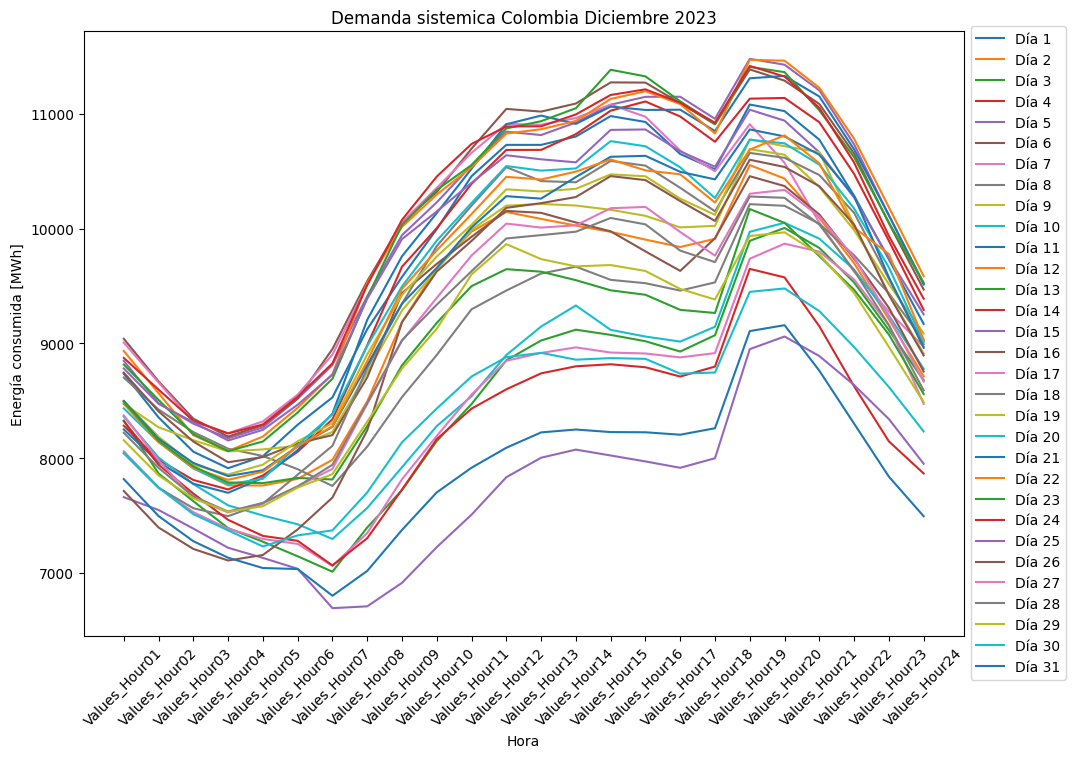

In [8]:
## Real demand (line x day analysis)
title = 'Demanda sistemica Colombia Diciembre 2023'
x = 'Hora'
y = 'Energía consumida [MWh]'
plotdaysdemand(demand, title, x, y)

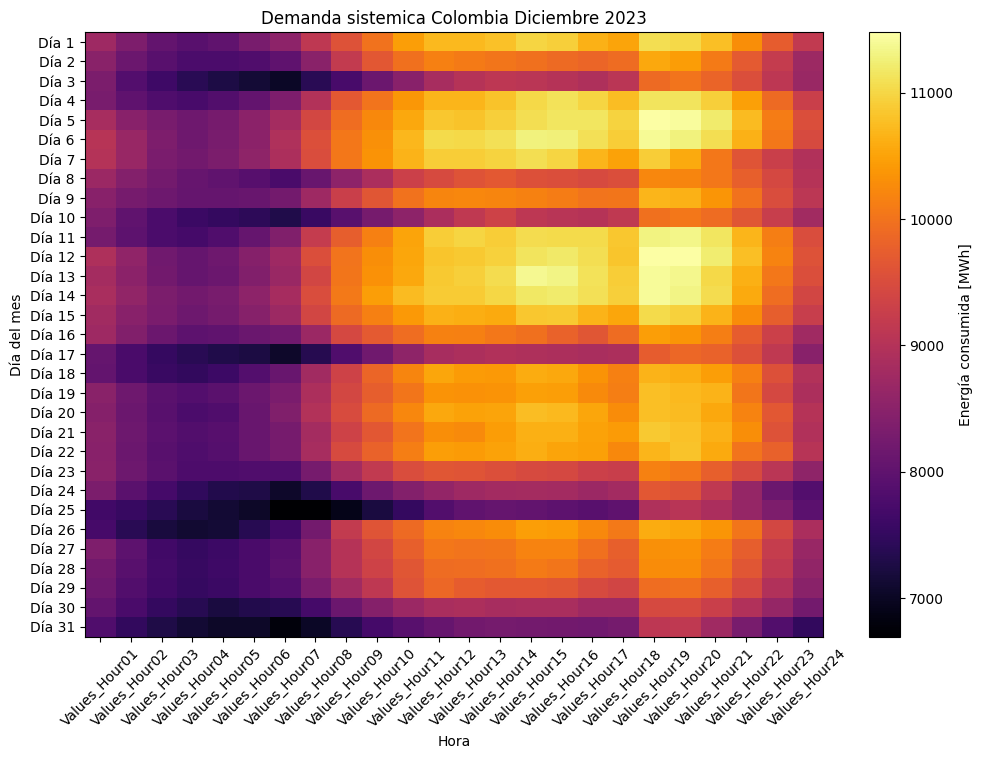

In [9]:
## Real demand (heat map analysis)
title = 'Demanda sistemica Colombia Diciembre 2023'
x = 'Hora'
y = 'Día del mes'
label = 'Energía consumida [MWh]'
plotdemand(demand, title, x, y, label)


In [12]:
### Demanda Regulada (System) [MWh]
december = objectAPI.request_data(
    "DemaRealReg",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "DemaRealReg",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

demand_reg = pd.concat([december, thirtyone], ignore_index=True)
demand_reg.iloc[:, 2:-1] /= 1000
demand_reg.head()

c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['Date'] = pd.to_datetime(data['Date'],errors='ignore', format= '%Y-%m-%d')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: 

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,5410.57388,5105.12855,4907.50934,4802.37140,4901.71889,5119.58488,5524.46077,6009.07091,...,7537.88436,7332.89720,7185.47934,7472.31292,7424.50574,7248.98964,6907.00214,6432.50636,5932.29327,2023-12-01
1,Sistema,Sistema,5491.59741,5179.85774,4966.39693,4851.08870,4867.56222,4929.42268,5250.96787,5705.81370,...,6802.07453,6681.77084,6758.97089,7196.57679,7138.66588,6927.70904,6626.08840,6228.29382,5797.94964,2023-12-02
2,Sistema,Sistema,5402.38419,5106.81588,4890.41001,4731.13466,4664.18336,4583.75349,4713.67056,5039.11425,...,6314.03870,6207.34494,6276.83445,6783.69076,6890.09921,6808.99943,6588.17761,6176.83469,5679.29457,2023-12-03
3,Sistema,Sistema,5270.41488,4984.75805,4806.44659,4723.48009,4818.12929,4990.19285,5425.09630,5943.57670,...,7474.66030,7315.59017,7176.78764,7472.33156,7543.94301,7408.40974,7057.41754,6486.43180,5898.78485,2023-12-04
4,Sistema,Sistema,5438.09847,5130.09132,4941.05435,4847.38972,4946.42475,5181.15598,5597.66627,6081.08736,...,7619.85873,7450.91663,7266.06450,7612.33809,7588.23293,7409.48930,7056.82895,6496.75847,5927.45236,2023-12-05


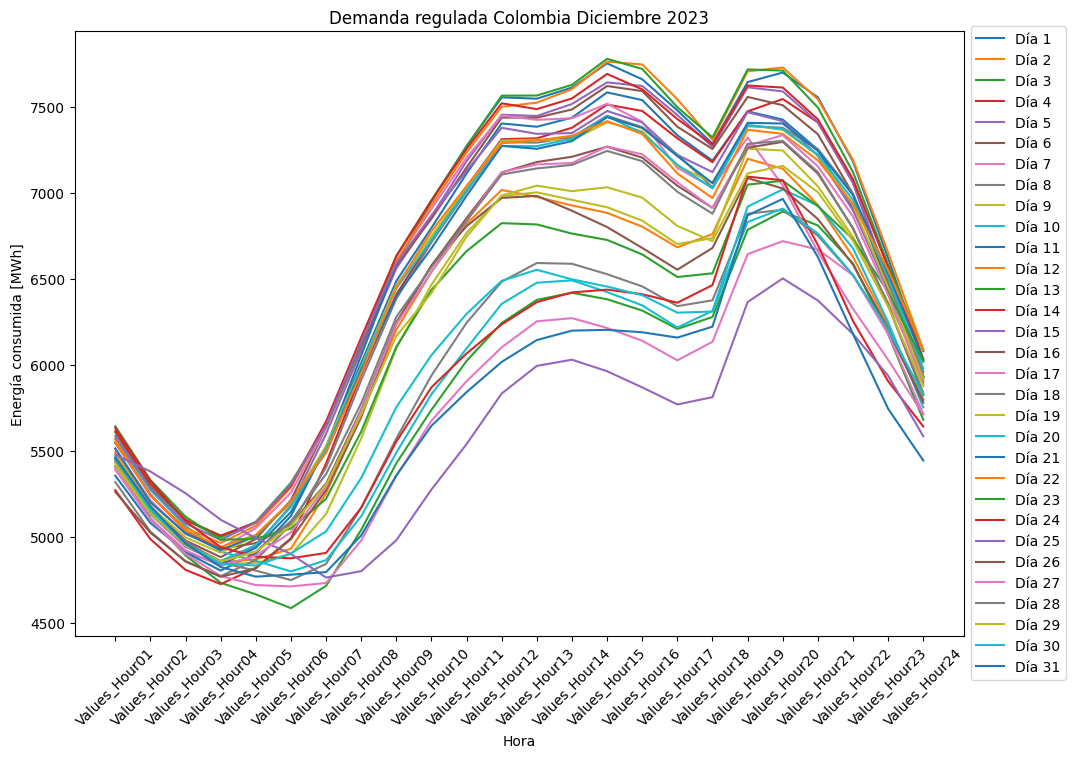

In [15]:
## Demanda regulada (line x day analysis)
title = 'Demanda regulada Colombia Diciembre 2023'
x = 'Hora'
y = 'Energía consumida [MWh]'
plotdaysdemand(demand_reg, title, x, y)

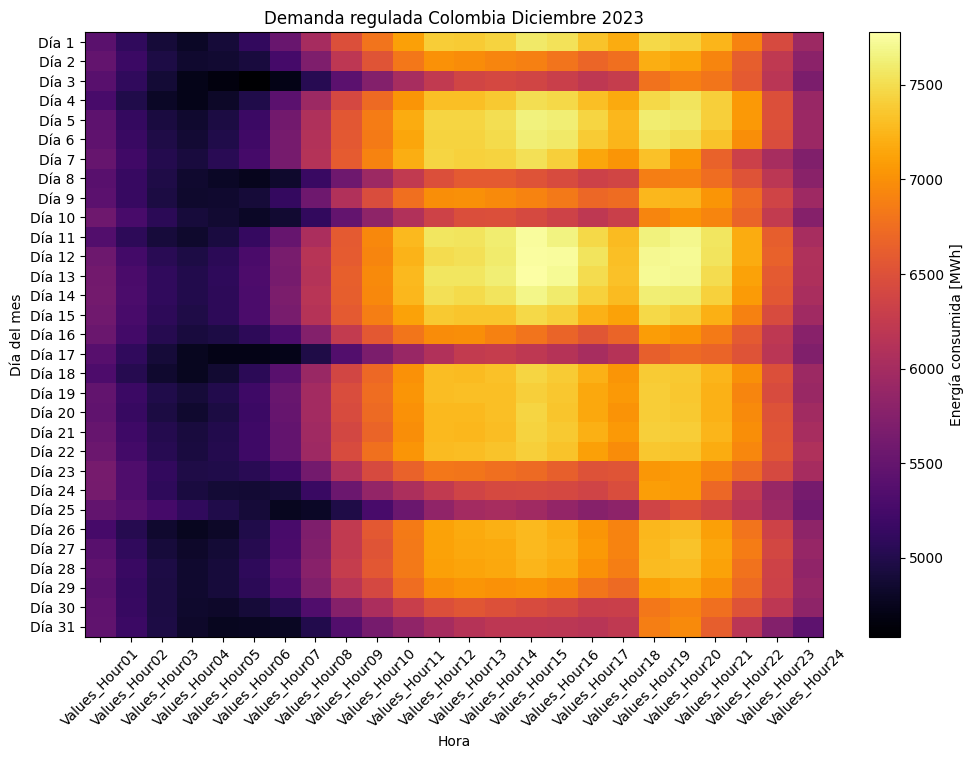

In [17]:
## Demanda regulada (heat map analysis)
title = 'Demanda regulada Colombia Diciembre 2023'
x = 'Hora'
y = 'Día del mes'
label = 'Energía consumida [MWh]'
plotdemand(demand_reg, title, x, y, label)

In [5]:
### Demanda No regulada (System) [MWh]
december = objectAPI.request_data(
    "DemaRealNoReg",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "DemaRealNoReg",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

demand_noreg = pd.concat([december, thirtyone], ignore_index=True)
demand_noreg.iloc[:, 2:-1] /= 1000
demand_noreg.head()

c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['Date'] = pd.to_datetime(data['Date'],errors='ignore', format= '%Y-%m-%d')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: 

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,3014.67830,2978.12304,2960.17400,2926.43806,2931.02732,2943.65740,2790.78555,2883.59489,...,3083.15809,3085.48960,3099.87213,3275.01962,3250.20025,3186.89478,3088.85769,3010.18911,2996.78840,2023-12-01
1,Sistema,Sistema,2953.69714,2925.96146,2904.72616,2869.21188,2851.19751,2849.18746,2692.59083,2751.54083,...,2759.21077,2814.59380,2808.79933,3007.43303,2940.15581,2865.28416,2774.70149,2733.08886,2667.96555,2023-12-02
2,Sistema,Sistema,2638.01198,2598.18038,2630.24166,2573.30635,2521.48934,2472.85188,2215.51575,2227.81492,...,2371.70618,2387.96228,2460.12793,2709.21957,2705.08547,2718.58463,2655.68791,2697.67072,2755.60435,2023-12-03
3,Sistema,Sistema,2770.72599,2752.03702,2755.48980,2758.15359,2785.50637,2823.57365,2674.95507,2799.78726,...,3188.57593,3219.50942,3171.90096,3356.52609,3320.97454,3243.95520,3139.68351,3119.68356,3094.34796,2023-12-04
4,Sistema,Sistema,3117.95059,3057.03723,3066.09242,3040.96733,3037.99222,3053.61115,2938.10585,3039.77967,...,3188.99524,3218.05989,3213.54429,3388.40915,3345.02024,3301.85102,3209.19116,3105.65820,3111.57611,2023-12-05


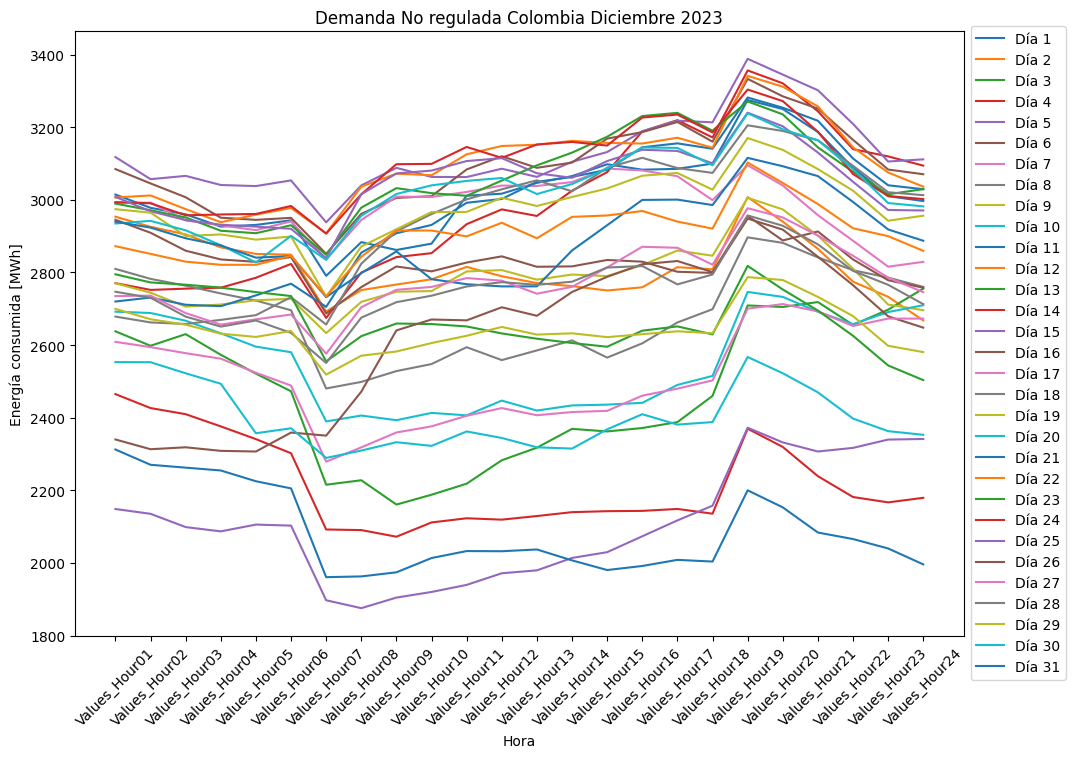

In [6]:
## Demanda No regulada (line x day analysis)
title = 'Demanda No regulada Colombia Diciembre 2023'
x = 'Hora'
y = 'Energía consumida [MWh]'
plotdaysdemand(demand_noreg, title, x, y)

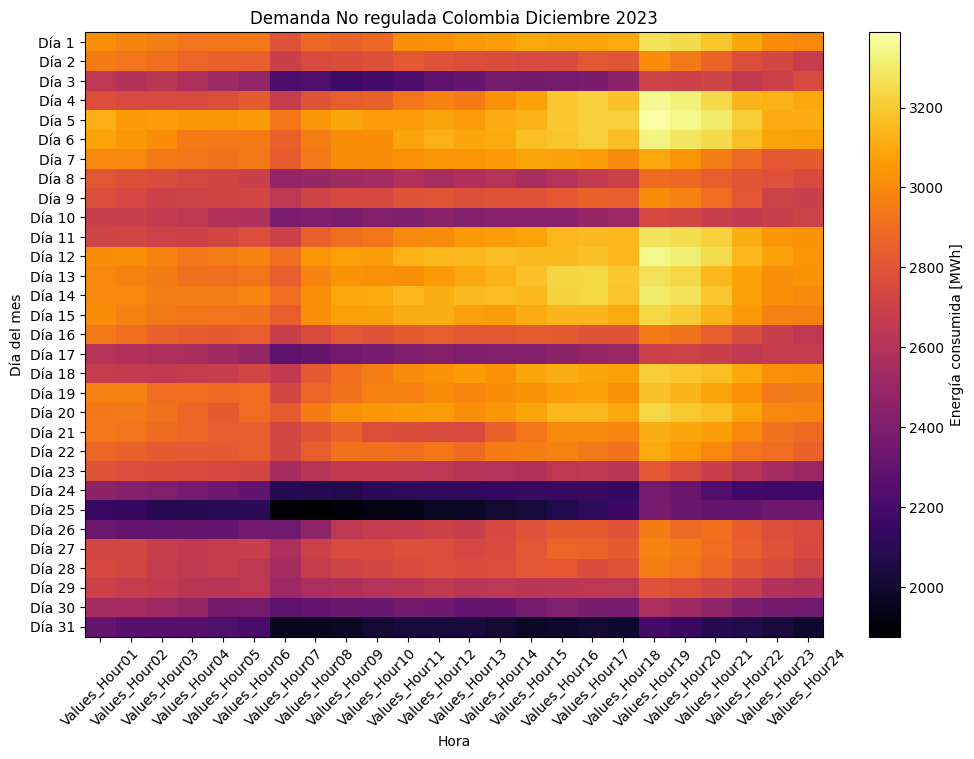

In [7]:
## Demanda No regulada (heat map analysis)
title = 'Demanda No regulada Colombia Diciembre 2023'
x = 'Hora'
y = 'Día del mes'
label = 'Energía consumida [MWh]'
plotdemand(demand_noreg, title, x, y, label)

In [14]:
### Generation (System) [MWh]
december = objectAPI.request_data(
    "Gene",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "Gene",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

generation = pd.concat([december, thirtyone], ignore_index=True)
generation.iloc[:, 2:-1] /= 1000
generation.head()

c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['Date'] = pd.to_datetime(data['Date'],errors='ignore', format= '%Y-%m-%d')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: 

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,8848.84948,8474.28680,8168.62487,8022.09441,8124.13580,8409.02568,8647.42084,9236.24775,...,11068.65985,10791.92641,10638.77661,11245.35198,11184.02133,10931.94847,10434.19688,9876.80948,9305.85475,2023-12-01
1,Sistema,Sistema,8619.44796,8263.30039,8031.37907,7875.17310,7875.82617,7935.64121,8088.03551,8599.93832,...,10059.37049,9993.03137,10066.62826,10729.52291,10609.87658,10251.74407,9847.24734,9342.17184,8844.35628,2023-12-02
2,Sistema,Sistema,8445.65146,7980.00935,7733.82108,7503.15828,7384.53189,7267.78633,7116.20560,7497.92002,...,9154.78218,9062.87264,9204.37493,10045.91932,10153.51962,9975.92413,9670.56671,9247.74974,8808.27735,2023-12-03
3,Sistema,Sistema,8415.24857,8113.15976,7944.26911,7864.37971,7986.72347,8198.77920,8477.85358,9115.62460,...,11284.60486,11164.36886,10917.65099,11288.89514,11302.10355,11092.18908,10636.25160,10035.46746,9413.18180,2023-12-04
4,Sistema,Sistema,8956.40608,8588.81126,8414.61819,8294.95326,8396.66838,8653.27595,8946.55593,9540.51698,...,11278.22134,11305.71514,11100.99423,11637.13069,11588.37054,11356.73070,10878.59281,10251.90413,9662.58854,2023-12-05


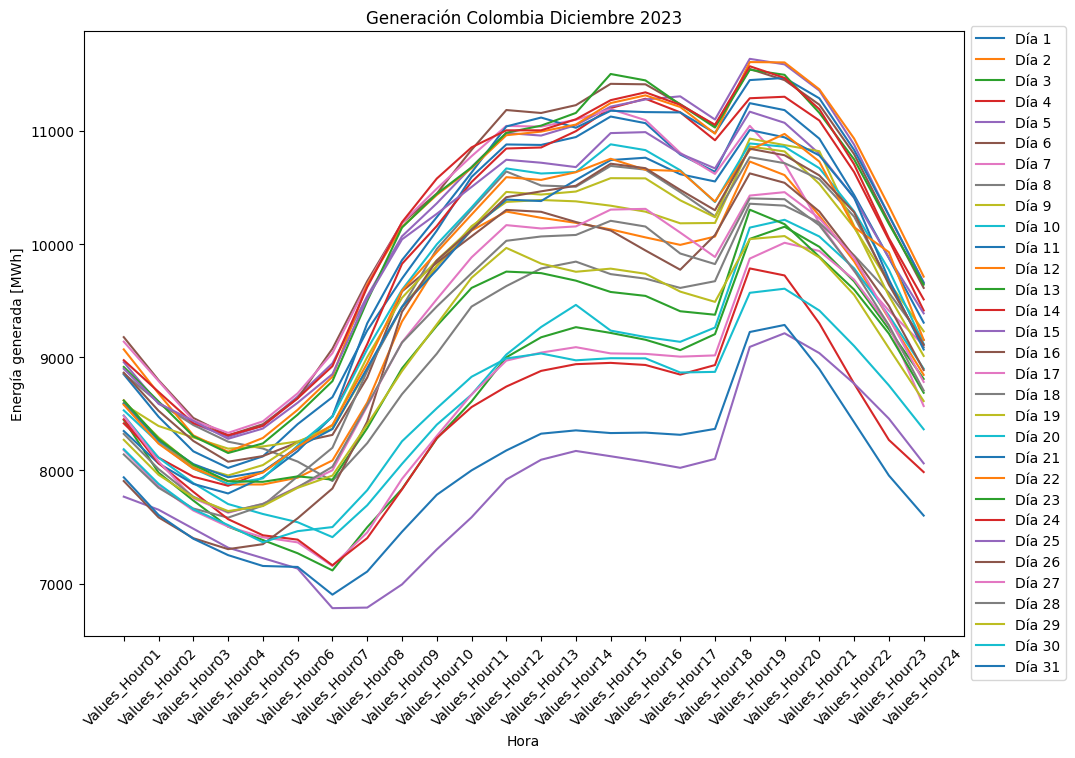

In [51]:
## Generation (line x day analysis)
title = 'Generación Colombia Diciembre 2023'
x = 'Hora'
y = 'Energía generada [MWh]'
plotdaysdemand(generation, title, x, y)

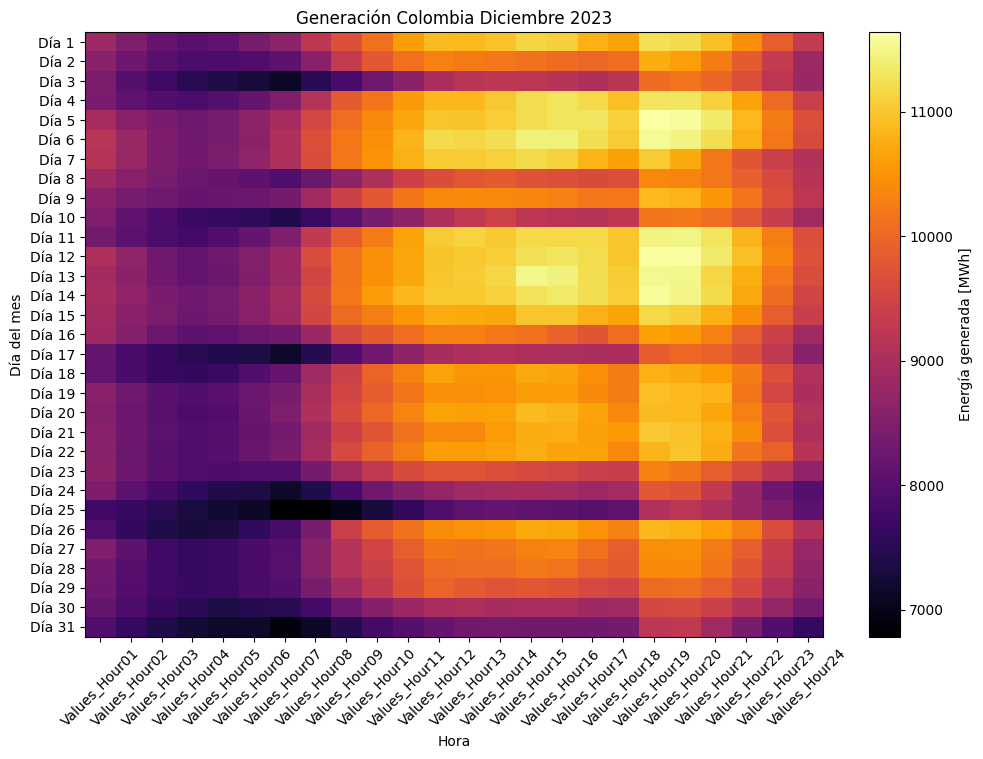

In [53]:
## Generation (heat map analysis)
title = 'Generación Colombia Diciembre 2023'
x = 'Hora'
y = 'Día del mes'
label = 'Energía generada [MWh]'
plotdemand(generation, title, x, y, label)

In [36]:
### Generation (Resource) [MWh]
decemberxresource = objectAPI.request_data(
    "Gene",
    "Recurso",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyonexresource = objectAPI.request_data(
    "Gene",
    "Recurso",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

generationxresource = pd.concat([decemberxresource, thirtyonexresource], ignore_index=True)
generationxresource.iloc[:, 2:-1] /= 1000
generationxresource.head()

c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['Date'] = pd.to_datetime(data['Date'],errors='ignore', format= '%Y-%m-%d')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: 

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Recurso,2QBW,12.08820,11.86120,11.68618,11.57627,11.50250,11.46072,11.91460,12.04663,...,11.47500,11.47658,11.40753,11.40963,11.53678,11.55634,11.40431,11.24553,11.14637,2023-12-01
1,Recurso,2QRL,0.64818,0.64752,0.64743,0.64710,0.64743,0.64746,0.64752,0.64743,...,0.64734,0.64734,0.64713,0.64674,0.64695,0.64707,0.64647,0.64680,0.64659,2023-12-01
2,Recurso,2QV2,6.87600,6.87600,6.87600,6.87600,6.87600,6.87600,6.87960,6.87960,...,6.86880,6.87240,6.87600,6.87240,5.27040,4.52880,6.49080,6.82200,6.39360,2023-12-01
3,Recurso,2R22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-01
4,Recurso,2S6Q,0.21300,0.03540,0.02820,0.00720,0.03720,0.06900,0.17880,0.13080,...,0.13140,0.18900,0.04380,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-01


In [41]:
## load listado recursos gen
df_recursos = pd.read_excel('Listado_Recursos_Generacion.xlsx', header=3)
#df_recursos = df_recursos[2:] # al especificar la fila 3 como la fila de titulos en el cargue del documento, se omite por defecto las primeras filas
df_recursos.rename(columns={'Código SIC': 'codigo'}, inplace=True)
df_recursos.head()

,codigo,Nombre Recurso,Capacidad Efectiva Neta [MW],Factor de Conversión,Es Menor,Tipo Despacho,Combustible por Defecto,Fecha Operación,Municipio,Departamento,Agente Representante,Estado Recurso,Tipo Generación,Clasificación
0,3C3X,AUTOG INGENIO MARIA LUISA,1.8,0.0,NO,ND,BAGAZO,2021-08-14,FLORIDA,VALLE DEL CAUCA,DEPI ENERGY S.A.S. E.S.P.,OPERACIÓN,TERMICA,AUTOGENERADOR
1,3AXV,AGPE INGENIO DE OCCIDENTE,1.0,0.0,NO,ND,BAGAZO,2021-03-04,VILLA RICA,CAUCA,EMPRESA MUNICIPAL DE ENERGIA ELECTRICA S.A. E....,OPERACIÓN,TERMICA,AUTOG PEQ. ESCALA
2,3AL6,AGPE ENTREPALMAS,0.5,0.0,NO,ND,BIOGAS,2020-12-31,SAN MARTIN,META,CELSIA COLOMBIA S.A. E.S.P.,OPERACIÓN,TERMICA,AUTOG PEQ. ESCALA
3,2YQO,AUTOG FERTICOL,17.0,1.0,NO,ND,GAS,2020-02-28,BARRANCABERMEJA,SANTANDER,CEMEX ENERGY S.A.S E.S.P.,INACTIVO,TERMICA,AUTOGENERADOR
4,2YWY,AUTOG TURGAS,3.5,1.0,NO,ND,GAS,2020-02-08,MARIQUITA,TOLIMA,TERMOPIEDRAS S.A. E.S.P.,OPERACIÓN,TERMICA,AUTOGENERADOR


In [72]:
## merge dataframes

df_merged = (
    generationxresource.merge(df_recursos[['codigo', 'Nombre Recurso']], left_on = 'Values_code', right_on = 'codigo')
    .drop(columns=['codigo'])
)
df_merged.insert(2, "Nombre recurso", df_merged.pop('Nombre Recurso'))

columns_to_sum = df_merged.columns[3:-1]
df_total = df_merged.groupby('Nombre recurso')[columns_to_sum].sum()
df_total = df_total.reset_index()
df_total['total'] = df_total.iloc[:, 3:-1].sum(axis=1)
df_sort = df_total.sort_values(by = 'total', ascending = False)
df_sort

,Nombre recurso,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,Values_Hour09,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,total
127,ITUANGO,26758.68048,26820.34507,26643.60187,26567.03890,26802.68860,27267.50994,28640.38951,29020.71632,28722.39814,...,29246.81021,29295.62626,29357.48924,29072.69355,29108.86050,29443.32095,28750.38822,27300.26370,27191.55984,599227.94693
110,GUAVIO,14336.47432,12677.89378,10990.32724,10179.87448,10150.31745,11557.69925,11788.45850,13504.64051,15557.64712,...,20695.38592,20950.43187,21940.68279,25674.66575,25574.10228,25148.45716,23982.27987,21858.68255,17016.33371,383001.69899
221,SAN CARLOS,11317.51057,10491.55001,9321.92906,8010.37099,7652.15978,8216.07831,8020.32710,9738.33465,11925.67099,...,21102.46466,21178.48256,21180.39787,24613.84306,24125.38391,22066.75151,20767.55591,18635.36585,14722.32835,343684.71654
240,TEBSAB CC,16102.56381,15841.62732,15660.14471,15399.41112,15191.94405,15396.40958,15004.05360,14926.01317,15201.41532,...,16404.33391,16442.34722,17058.97346,17775.63461,17589.55937,17376.06417,17091.24830,16752.93336,16609.81589,339821.32157
71,CHIVOR,10883.67736,9859.95473,9532.66326,9277.82162,9342.20295,9429.19052,9231.87168,8973.44454,9099.15236,...,13398.63812,14075.77721,14640.50317,17615.55386,17423.15232,16035.92647,14000.19399,12367.20345,11891.33894,252277.87005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,AGPE FERCH2,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00039,0.00941,0.03054,...,0.02476,0.01016,0.00020,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.40070
78,COMUNIDAD EL SALVADOR II,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00199,0.01094,...,0.03447,0.01859,0.00819,0.00141,0.00000,0.00000,0.00000,0.00000,0.00000,0.35292
2,AGPE ENTREPALMAS,0.01671,0.01236,0.01392,0.00834,0.01369,0.01686,0.01710,0.01787,0.01224,...,0.01269,0.01310,0.01274,0.01758,0.01941,0.02031,0.01677,0.01587,0.01750,0.33557
245,TEQUENDAMA BIOGAS,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.02580,0.02160,0.00480,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.10860


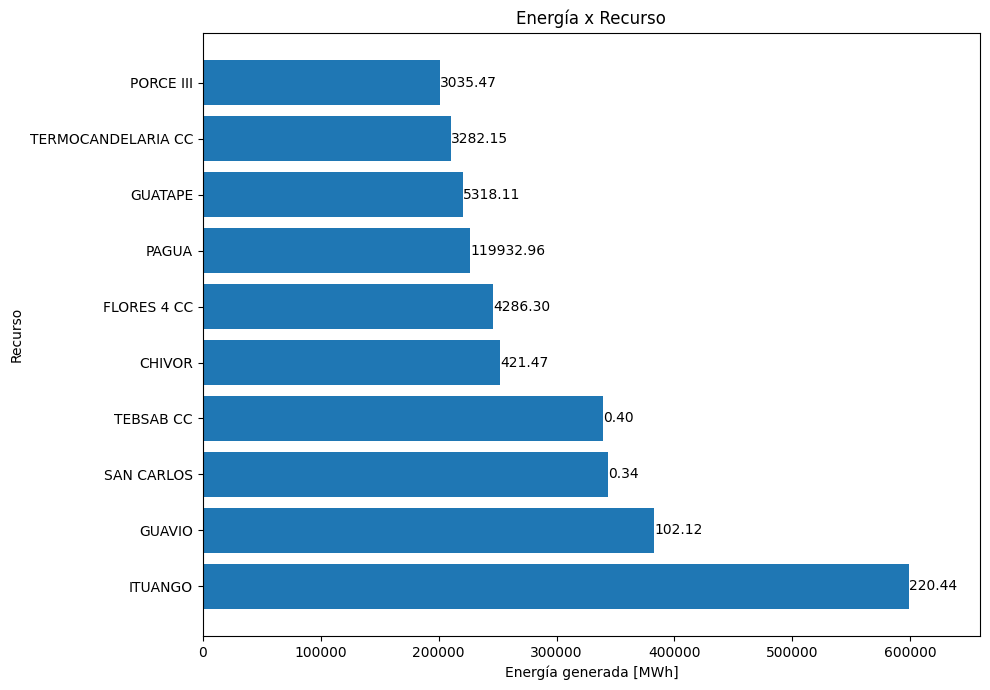

In [76]:

fig, ax = plt.subplots(figsize=(10, 7))


bars = ax.barh(df_sort.head(10)['Nombre recurso'], df_sort.head(10)['total'])

for bar, value in zip(bars, df_total['total']):
    ax.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2, f'{value:.2f}', 
            va='center', ha='left')

ax.set_xlabel('Energía generada [MWh]')
ax.set_ylabel('Recurso')
ax.set_title('Energía x Recurso')
ax.set_xlim(right=df_total['total'].max() * 1.1)

fig.tight_layout()
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1.02), ncol=1)
plt.xticks(rotation=0)
plt.show()

In [29]:
### stock price [COP/kWh]
december = objectAPI.request_data(
    "PrecBolsNaci",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "PrecBolsNaci",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

stockprice = pd.concat([december, thirtyone], ignore_index=True)
stockprice.head()

c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['Date'] = pd.to_datetime(data['Date'],errors='ignore', format= '%Y-%m-%d')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:232: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jeber\miniconda3\envs\apixm\Lib\site-packages\pydataxm\pydataxm.py:234: 

,Id,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,Sistema,Sistema,588.58017,558.58017,558.58017,558.58017,558.58017,558.58017,655.58017,655.58017,...,762.58017,762.58017,762.58017,762.58017,762.58017,762.58017,762.58017,754.58017,748.58017,2023-12-01
1,Sistema,Sistema,741.85120,727.89420,727.89420,727.89420,727.89420,727.89420,727.89420,727.89420,...,762.89420,762.89420,787.39420,787.39420,787.39420,787.39420,762.89420,762.89420,741.85120,2023-12-02
2,Sistema,Sistema,744.75172,744.75172,744.75172,744.75172,744.75172,744.75172,714.75172,619.75172,...,752.25172,752.25172,752.25172,759.75172,759.75172,759.75172,759.75172,752.25172,752.25172,2023-12-03
3,Sistema,Sistema,638.44860,618.89560,724.33060,618.89560,724.33060,724.33060,693.89560,728.89560,...,804.39560,804.39560,804.39560,813.89560,813.89560,813.89560,798.89560,798.89560,804.39560,2023-12-04
4,Sistema,Sistema,753.79185,752.79185,752.79185,752.79185,752.79185,752.79185,752.79185,752.79185,...,851.79185,851.79185,851.79185,851.79185,851.79185,821.79185,816.79185,851.79185,821.79185,2023-12-05


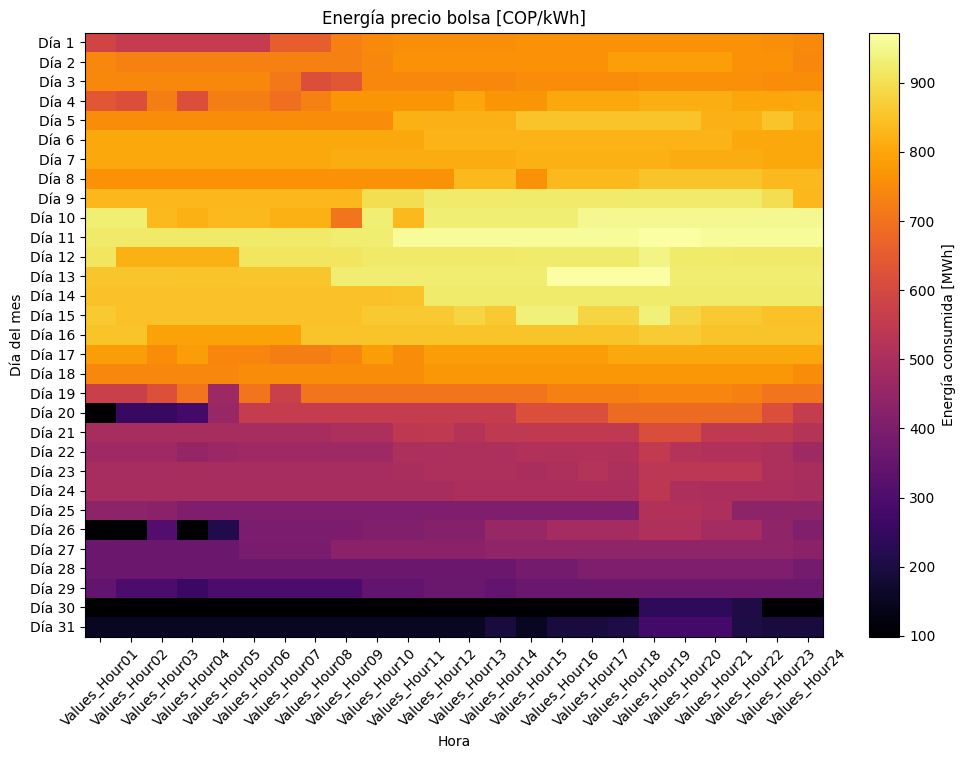

In [30]:
title = 'Energía precio bolsa [COP/kWh]'
plotdemand(stockprice, title)

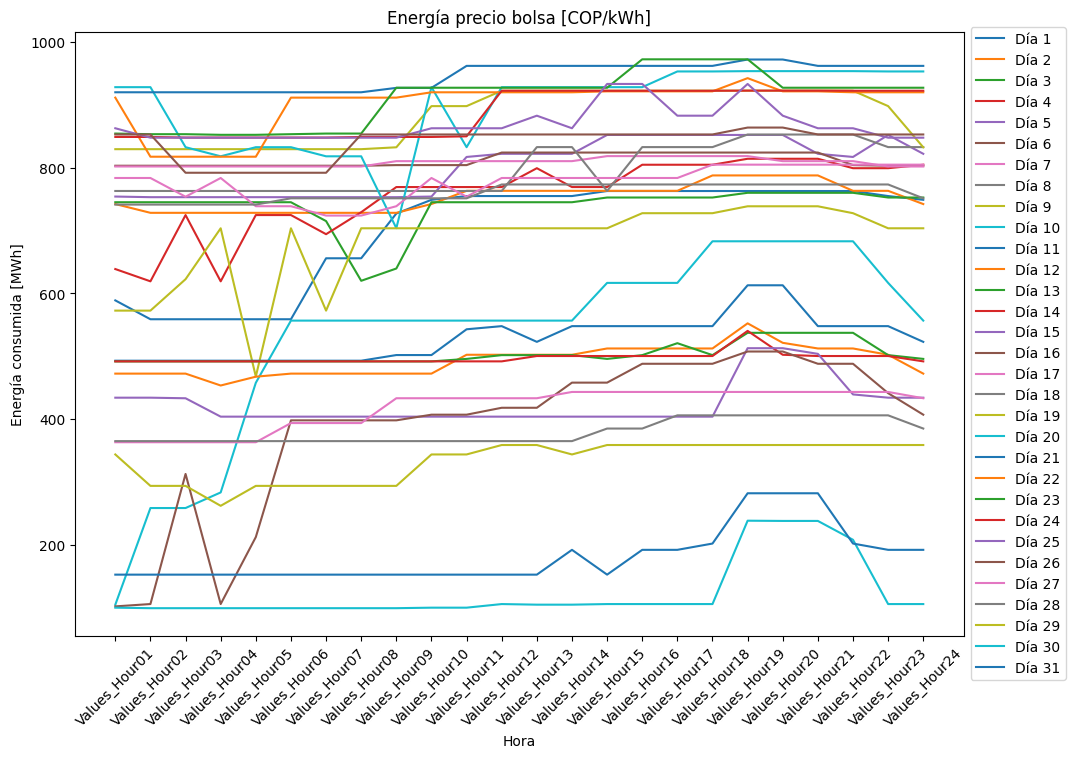

In [31]:
title = 'Energía precio bolsa [COP/kWh]'
plotdaysdemand(stockprice, title)

In [ ]:
### scarcity price [COP/kWh]
## Precio de Escasez de Activación calculado de acuerdo con la Resolución CREG 140 del 2017
scarcity_activation = objectAPI.request_data(
    "PrecEscaAct",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 1)
)

## Establecido por la CREG- y actualizado mensualmente con base en la variación de un índice de precios de combustibles
scarcity_december = objectAPI.request_data(
    "PrecEsca",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 1)
)

In [ ]:
### Energía Comprada y vendida [kWh] en Bolsa para atender la demanda
december = objectAPI.request_data(
    "CompBolsNaciEner",
    "Sistema",
    dt.date(2023, 12, 1),
    dt.date(2023, 12, 30)
)

thirtyone = objectAPI.request_data(
    "CompBolsNaciEner",
    "Sistema",
    dt.date(2023, 12, 31),
    dt.date(2023, 12, 31)
)

purchased_energy = pd.concat([december, thirtyone], ignore_index=True)
purchased_energy